## Reading DataSet

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding = "utf-8")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [6]:
df = df.drop_duplicates()
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
print ( df["v1"].value_counts() )
df["v1"].value_counts(normalize= True)

v1
ham     4516
spam     653
Name: count, dtype: int64


v1
ham     0.87367
spam    0.12633
Name: proportion, dtype: float64

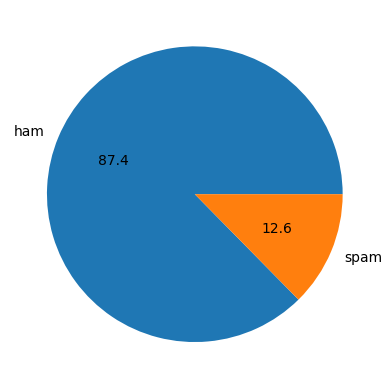

In [8]:
import matplotlib.pyplot as plt
plt.pie ( df["v1"].value_counts() , labels = df["v1"].unique(), autopct = "%0.1f") 
plt.show()

In [9]:
# Ham >> Spam 
# data is not balanced

In [10]:
# one hothead encoding
from sklearn.preprocessing import LabelEncoder

In [11]:
df["v1"] = LabelEncoder().fit_transform(df["v1"])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df["v1"].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

In [13]:
# 0 for ham 
# 1 for spam

In [14]:
df["character_count"] = df["v2"].apply(len)
df.head()

,v1,v2,character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### Box Plot

In [15]:
# for ham
df[df["v1"] == 1 ]["character_count"].describe()

count    653.000000
mean     137.479326
std       30.014336
min       13.000000
25%      131.000000
50%      148.000000
75%      157.000000
max      223.000000
Name: character_count, dtype: float64

In [16]:
# for spam
df[df["v1"] == 0 ]["character_count"].describe()

count    4516.000000
mean       70.457263
std        56.357463
min         2.000000
25%        34.000000
50%        52.000000
75%        90.000000
max       910.000000
Name: character_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc2fdcd010>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc2fd3a250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc2fd443d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc2fddc110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc0dda4b90>],
 'means': []}

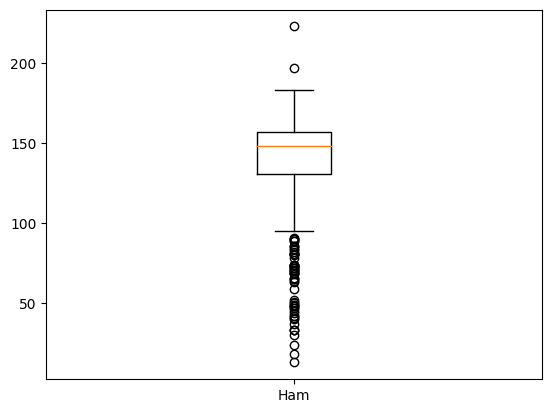

In [17]:
plt.boxplot(df[df["v1"] == 1 ]["character_count"], labels= ["Ham"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc2fe1d550>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc2fd2a8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc2fe38610>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc2fe3bf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc2fe44910>],
 'means': []}

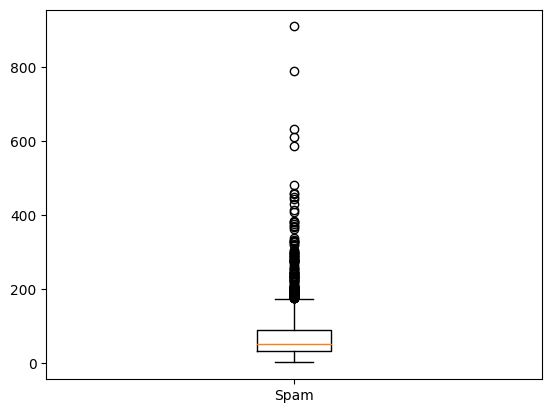

In [18]:
plt.boxplot(df[df["v1"] == 0 ]["character_count"], labels= ["Spam"])

In [19]:
# no clear lead for distinguishing bw spam and ham no the basis of the number of words in each email.

In [20]:
import seaborn as sns

<Axes: xlabel='v1', ylabel='character_count'>

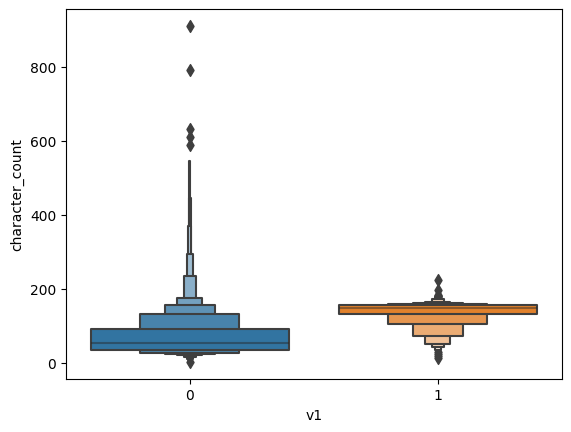

In [21]:
sns.boxenplot (
    x = df["v1"],
    y = df['character_count'],
)

#### Histogram

<Axes: xlabel='character_count', ylabel='Count'>

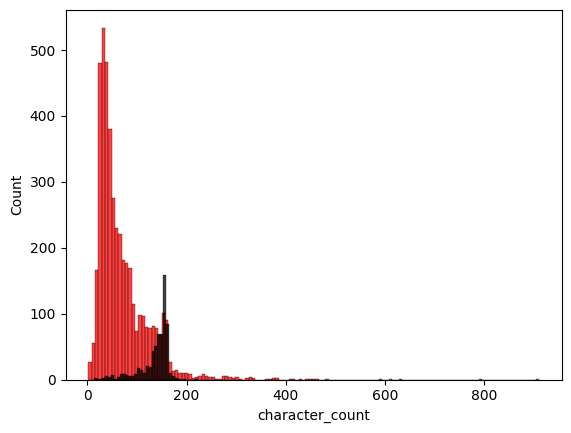

In [22]:
sns.histplot(df[df["v1"] == 0 ]["character_count"], color="red")
sns.histplot(df[df["v1"] == 1 ]["character_count"],color = "black")

#### Correlation

In [23]:
df.corrwith(df["v1"],numeric_only=True)

v1                 1.000000
character_count    0.382779
dtype: float64

<Axes: >

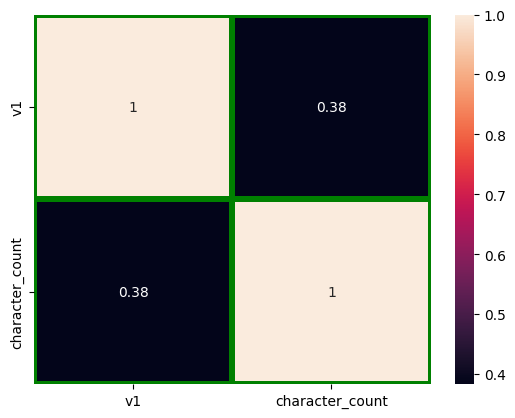

In [24]:
sns.heatmap(df.corr(numeric_only=True) ,annot= True, linewidths=3, linecolor= "green")

## PreProccessing

##### Tokenization

In [25]:
import nltk

In [26]:
def tokenization (sentence : str ) -> list :
    tokens = nltk.word_tokenize(sentence.lower())
    return tokens

##### Stop Words Removal

In [27]:
from nltk.corpus import stopwords

In [28]:
len(stopwords.words("english"))

179

In [29]:
def stop_word_remove (tokens : list ) -> list :
    a = []
    for token in tokens :
        if token not in stopwords.words("english"):
            a.append(token ) 
    return a

##### Punctuation Removal

In [30]:
def punctuation_removal ( tokens : list ) -> list:
    punctuation = [".",",","/","'","?","\"","-","_",";",":","&","$","!","@","#","%","*","(",")"]
    a = []
    for token in tokens:
        if token not in punctuation:
            a.append(token)
    return a

##### Stemming & Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [32]:
def stem_lemma ( tokens : list ) -> str :
    lemmas = []
    for token in tokens: 
        lemmas.append(wnl.lemmatize(token))
    return " ". join(lemmas)

##### Final Transformation

In [33]:
def final_transformation (sentence : str ) -> str :
    a = stem_lemma(punctuation_removal(stop_word_remove(tokenization(sentence))))
    return a

In [34]:
df["pre_processed"] = df["v2"].apply(lambda x : final_transformation(x))

In [35]:
df.head()

,v1,v2,character_count,pre_processed
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah n't think go usf life around though


In [36]:
ham_list = df[df["v1"]==0 ]["pre_processed"].tolist()

In [37]:
spam_list = df[df["v1"]== 1]["pre_processed"].tolist()

In [38]:
from wordcloud import WordCloud
wc = WordCloud()

In [39]:
words_in_ham = wc.generate(" ". join(ham_list) )

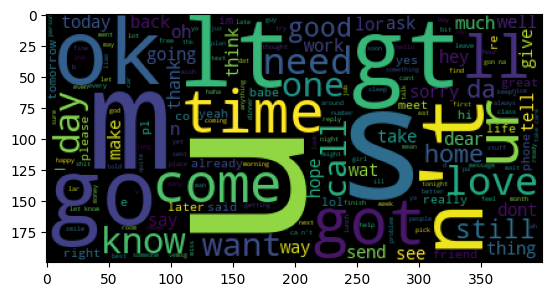

In [40]:
plt.imshow(words_in_ham)

In [41]:
words_in_spam = wc.generate(" ". join(spam_list) )

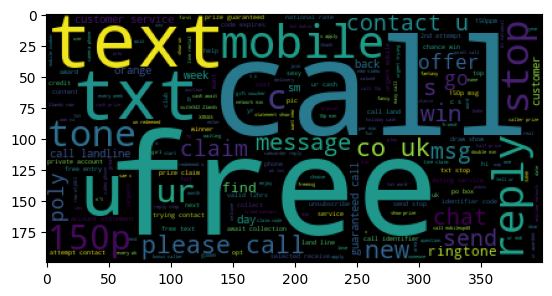

In [42]:
plt.imshow(words_in_spam)

## Naive Bayes Model

Vectorization

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tfidf = TfidfVectorizer()

In [45]:
X = tfidf.fit_transform(df["pre_processed"])
X = X.toarray()
# vectors_ = pd.DataFrame(X)
y = np.array(df["v1"].values)

In [46]:
print(X.shape)
y.shape

(5169, 8071)


(5169,)

##### Train - Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [48]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
y_test.shape

(4135, 8071)
(4135,)
(1034, 8071)


(1034,)

##### Bernoulli Naive Bayes

In [49]:
from sklearn.naive_bayes import BernoulliNB

In [50]:
bnb = BernoulliNB()

In [51]:
bnb.fit(X_train,y_train)

BernoulliNB()

##### Multinomial Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
mnb = MultinomialNB()

In [54]:
mnb.fit(X_train,y_train)

MultinomialNB()

##### Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
gnb = GaussianNB()

In [57]:
gnb.fit(X_train,y_train)

GaussianNB()

## Evaluation

In [58]:
y_pred_bnb = bnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_gnb = gnb.predict(X_test)

In [59]:
print (y_pred_bnb.shape)
print (y_pred_mnb.shape)
print (y_pred_gnb.shape)

(1034,)
(1034,)
(1034,)


In [60]:
from sklearn.metrics import accuracy_score, precision_score

In [61]:
print("Accuracy - ")
print ("BernoulliNB : ", accuracy_score(y_test,y_pred_bnb))
print ("MultinomialNB : ", accuracy_score(y_test,y_pred_mnb))
print ("GaussianNB : ", accuracy_score(y_test,y_pred_gnb))

Accuracy - 
BernoulliNB :  0.9796905222437138
MultinomialNB :  0.9622823984526112
GaussianNB :  0.8839458413926499


In [62]:
print("Precision - ")
print ("BernoulliNB : ", precision_score(y_test,y_pred_bnb))
print ("MultinomialNB : ", precision_score(y_test,y_pred_mnb))
print ("GaussianNB : ", precision_score(y_test,y_pred_gnb))

Precision - 
BernoulliNB :  0.9907407407407407
MultinomialNB :  1.0
GaussianNB :  0.5165876777251185


In [63]:
# we can see that Bernoulli NB  and Multinomila NB have good balance between the accuracy and precision

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

##### Binomial NB

In [65]:
print (classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       907
           1       0.99      0.84      0.91       127

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



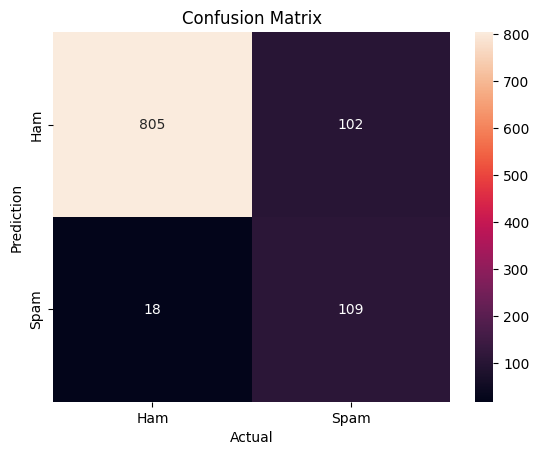

In [66]:
cm_bnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_bnb,
            annot = True,
            fmt = "g",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"],
            )
plt.ylabel("Prediction")
plt.xlabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##### Multinomial NB

In [67]:
print (classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       907
           1       1.00      0.69      0.82       127

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



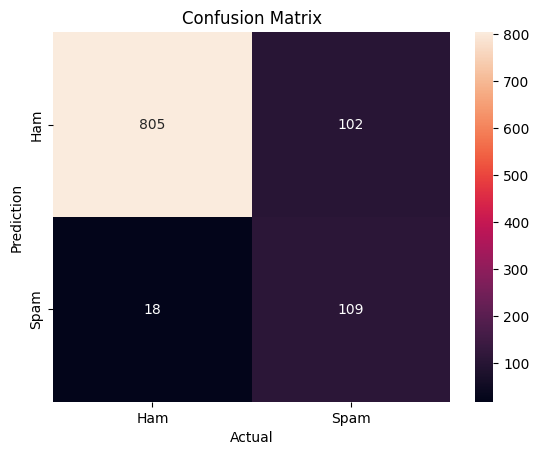

In [68]:
cm_mnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_mnb,
            annot = True,
            fmt = "g",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"],
            )
plt.ylabel("Prediction")
plt.xlabel("Actual")
plt.title("Confusion Matrix")
plt.show()